In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import tweepy as tw #for accessing Twitter API


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!ls

drive  sample_data


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/DS Project/TrainingData.csv.xls",encoding= 'unicode_escape')
df2.head()


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
df2.shape

(27481, 10)

In [ ]:
# Load Tweet dataset
#df2 = pd.read_csv('./TrainingData.csv',encoding='unicode_escape')
df2 = df2.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df2['category'] = df2['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
# Output first five rows
df2.head()
df=df2

In [ ]:
df.head()

,textID,clean_text,selected_text,category,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",0.0,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,-1.0,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,-1.0,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,-1.0,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",-1.0,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
df.dropna(axis=0, inplace=True)
# dimensionality of the data
df.shape

(27480, 10)

In [ ]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# Output first five rows
df.head()

,textID,clean_text,selected_text,category,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",Neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,Negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,Negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,Negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",Negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

In [ ]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in df['clean_text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

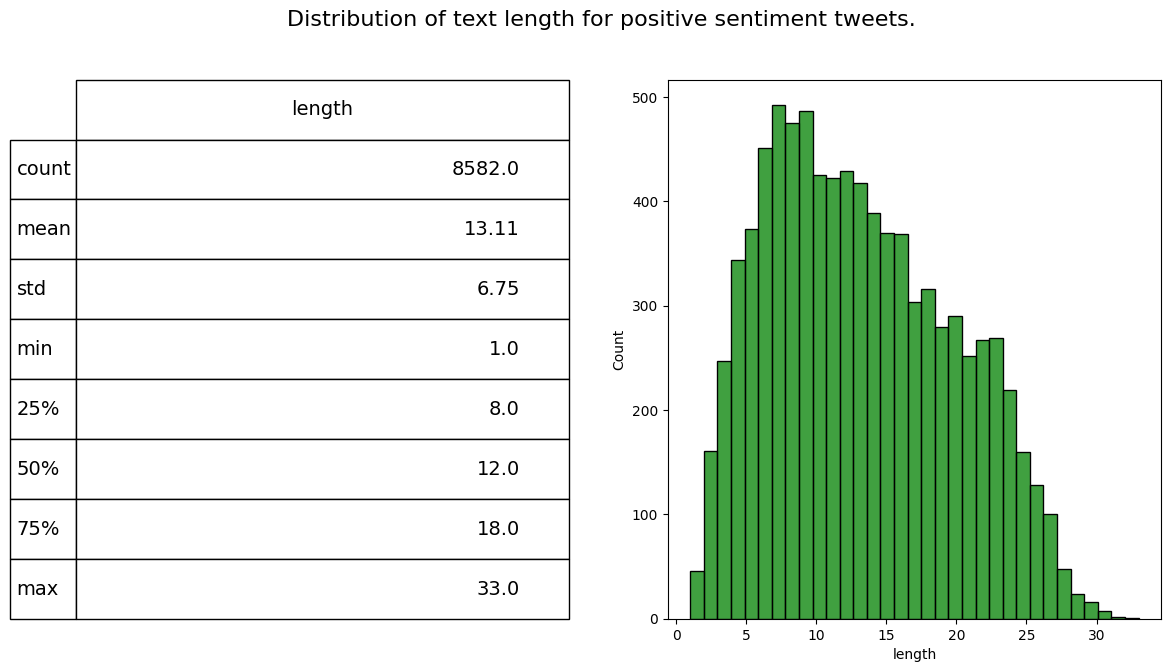

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()


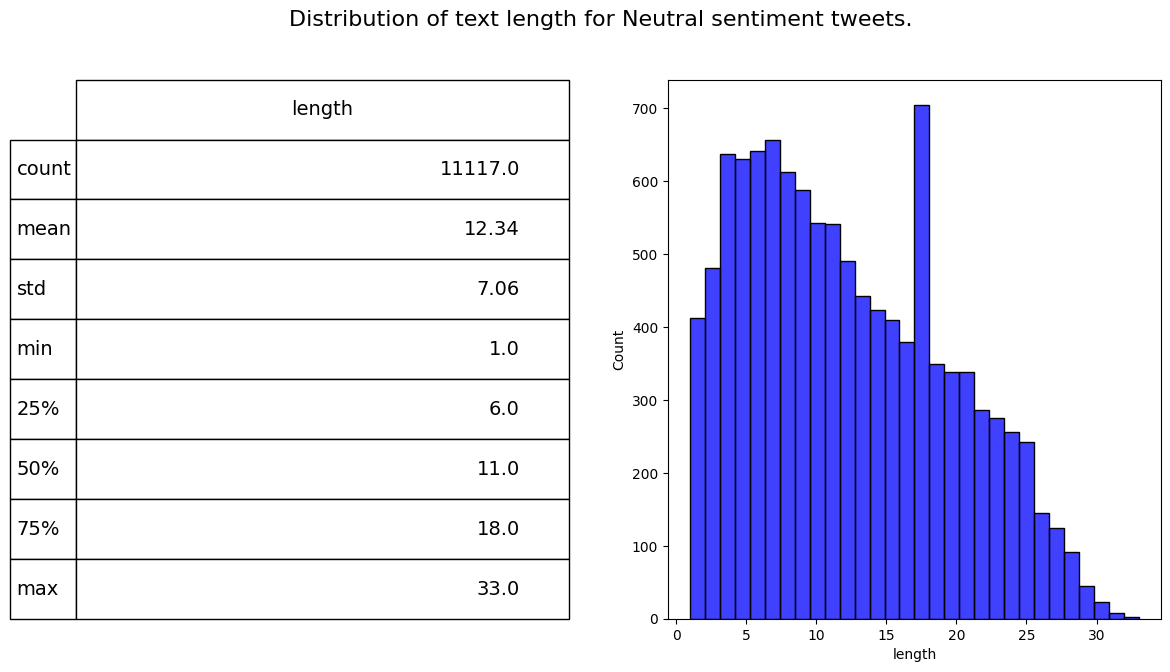

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Neutral']['length'], ax=ax1,color='blue')
describe = df.length[df.category=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Neutral sentiment tweets.', fontsize=16)

plt.show()

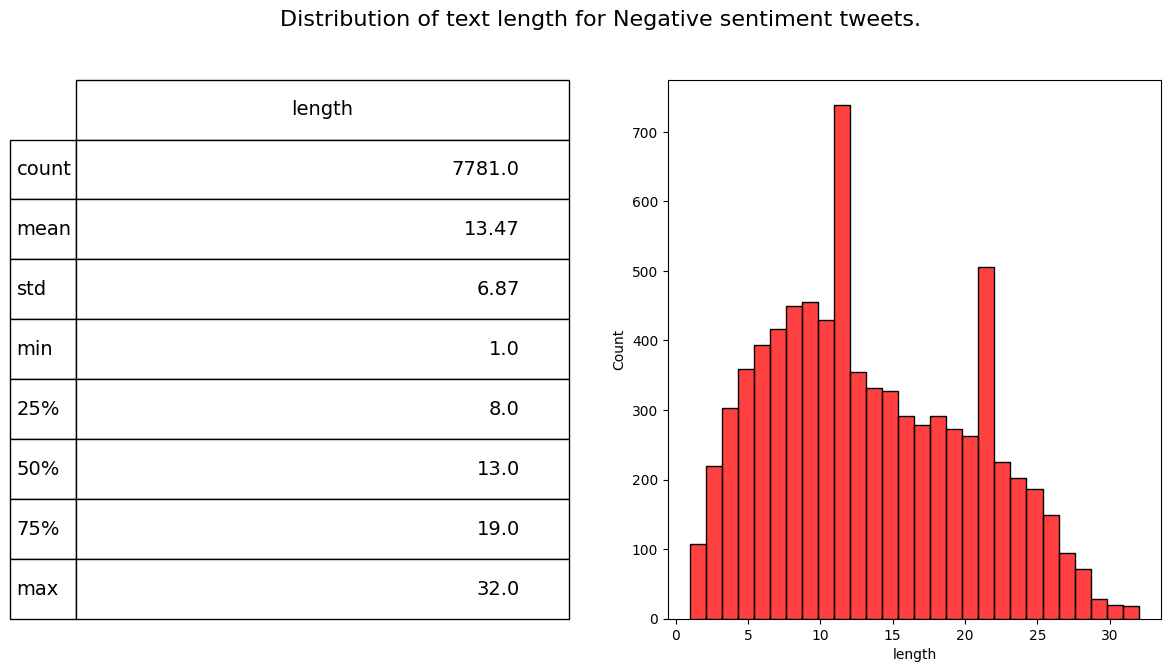

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()


In [ ]:
import plotly.express as px
custom_colors = ['salmon', 'powderblue', 'seagreen']
fig = px.pie(df, names='category', title ='Pie chart of different sentiments of tweets', color_discrete_sequence=custom_colors)
fig.show()

In [ ]:
df.drop(['length'], axis=1, inplace=True)
df.head()

,textID,clean_text,selected_text,category,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",Neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,Negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,Negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,Negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",Negative,noon,60-70,Angola,32866272,1246700.0,26


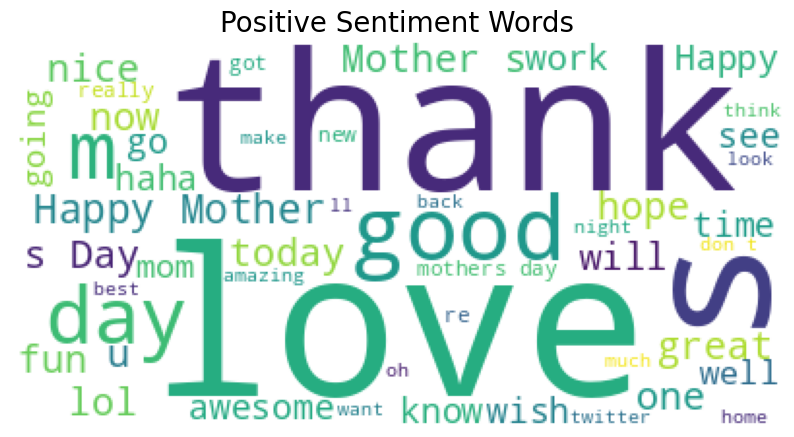

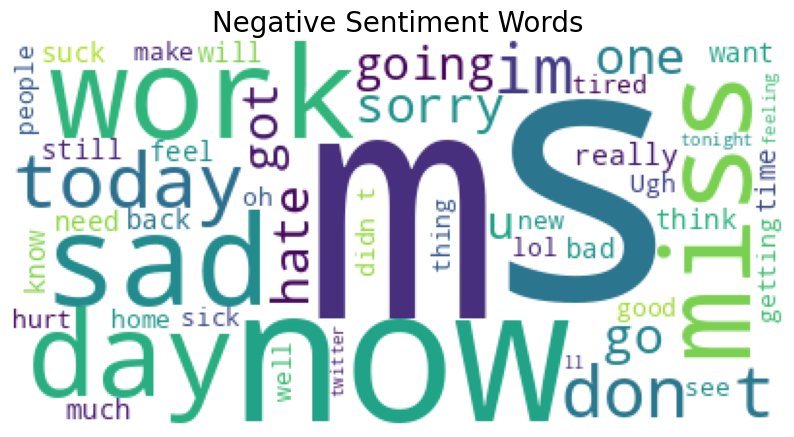

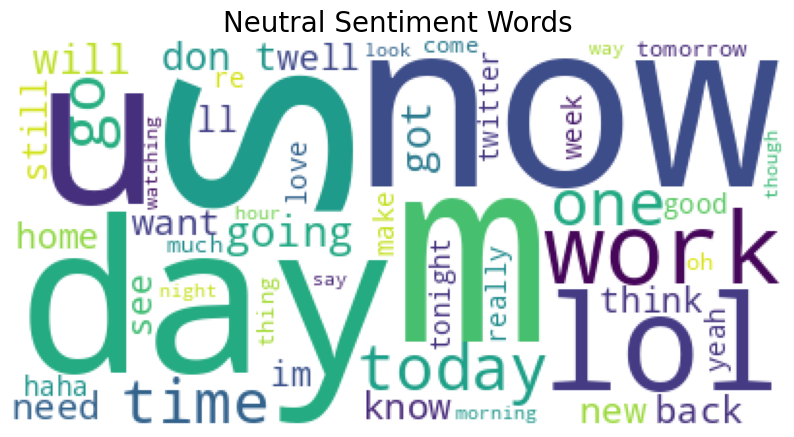

In [ ]:


from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])

    # Initialize wordcloud object
    wc = WordCloud(background_color='white',
                   max_words=50,
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

# Positive tweet words
wordcount_gen(df, 'Positive')

# Negative tweet words
wordcount_gen(df, 'Negative')

# Neutral tweet words
wordcount_gen(df, 'Neutral')

In [ ]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    tweet=str(tweet)
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))



Original tweet ->  I`d have responded, if I were going

Processed tweet -> ['respond', 'go']


In [ ]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, df['clean_text']))
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])
print(X[0])
print(Y[0])

['respond', 'go']
1


In [ ]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x)
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
# print first 200 words/tokens
print(count_vector.get_feature_names_out()[0:200])

['0' '00' '000' '01' '04' '05' '06' '07' '08' '09' '0981' '1' '10' '100'
 '1000' '101' '102' '10am' '10k' '10pm' '10th' '11' '12' '1210' '123'
 '128' '12am' '12st' '12th' '13' '132' '14' '140' '15' '150' '15th' '16'
 '160' '16th' '17' '18' '18th' '19' '1st' '2' '20' '200' '2008' '2009'
 '2010' '20th' '21' '22' '22nd' '24' '25' '26' '27' '28' '29' '2am' '2b'
 '2day' '2moro' '2morrow' '2nd' '2night' '2nite' '2pm' '2w5v' '3' '30'
 '30am' '30pm' '31' '31st' '33' '333' '35' '36' '360' '38' '39' '3am' '3d'
 '3g' '3hr' '3rd' '3wordsaftersex' '3x' '4' '40' '400' '404' '40min' '41'
 '42nd' '44' '45' '48' '4am' '4ever' '4fzo7' '4gb' '4j585' '4jam0' '4pm'
 '4th' '4wh4d' '5' '50' '500' '55' '5am' '5k' '5pm' '5th' '6' '60' '600'
 '614' '630' '67hac' '67tp9' '6am' '6th' '7' '70' '75' '78' '7am' '7pm'
 '7th' '8' '80' '800' '85' '8am' '8d' '8th' '9' '90' '95' '99' '9am' '9pm'
 '9th' 'aaaa' 'aaaah' 'aaah' 'aaahhh' 'aaawww' 'aah' 'aaron' 'ab'
 'abandon' 'abbey' 'abbi' 'abbrevi' 'abc' 'abid' 'abil' 'abit

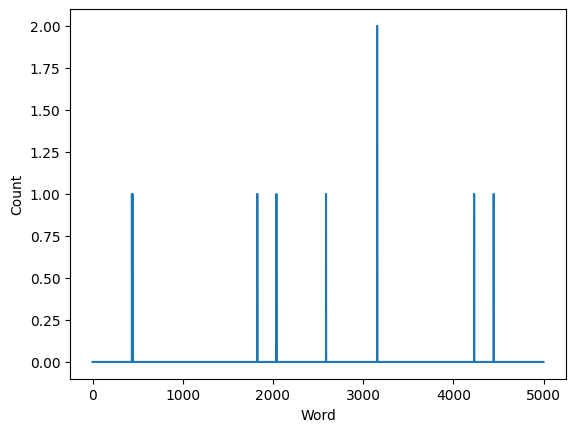

In [ ]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    print(type(text))
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_text'][0], df['clean_text'][1] )
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0], X[1])

Before Tokenization & Padding 
  I`d have responded, if I were going  Sooo SAD I will miss you here in San Diego!!!
<class 'pandas.core.series.Series'>
After Tokenization & Padding 
 [  1 165  19  73   1 150  48   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] [ 423  119    1   62   94    7   91   10 1469 2304    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:

print('Before Tokenization & Padding \n', type(df['clean_text'][0]), df['clean_text'][1] )

Before Tokenization & Padding 
 <class 'str'>  Sooo SAD I will miss you here in San Diego!!!


In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
type(tokenizer)

keras.src.preprocessing.text.Tokenizer

In [ ]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (16488, 50) (16488, 3)
Validation Set -> (5496, 50) (5496, 3)
Test Set -> (5496, 50) (5496, 3)


In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets
from tensorflow.keras.optimizers import legacy

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = legacy.SGD(learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

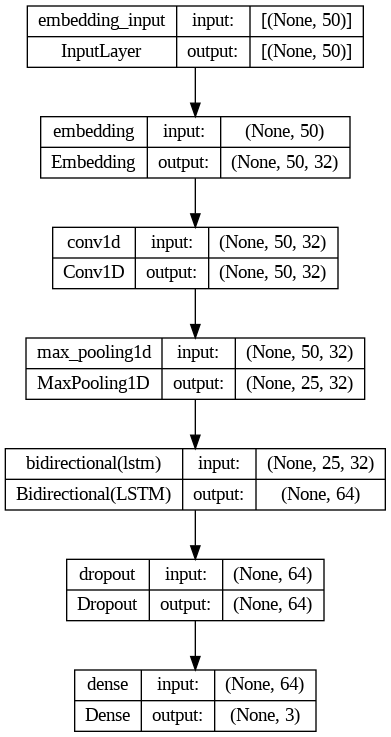

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 25, 32)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.6867
Precision : 0.6937
Recall    : 0.6714
F1 Score  : 0.6824


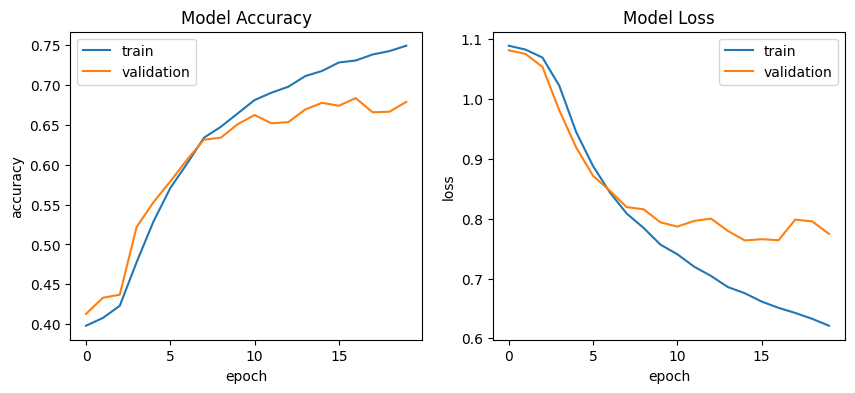

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

172/172 [==============================] - 1s 4ms/step


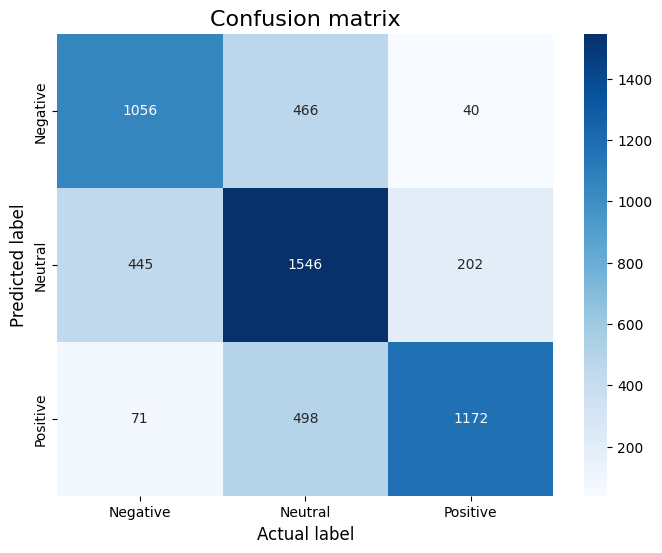

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [ ]:
from keras.models import *
# Save the model
filepath = './lstm_senti'
save_model(model, filepath)

In [ ]:
# Load the model
from keras.models import *
model = load_model('./lstm_senti', compile = True)

In [ ]:
mytext='Joyful, Smiling, Blissful, Content, Delighted, Ecstatic, Elated, Excited, Exhilarated, Gleeful, Grateful, Harmonious, Jovial, Merry, Optimistic, Upbeat, Cheerful, Euphoric, Radiant, Satisfied, Sunny, Triumphant, Buoyant, Overjoyed, Jubilant, Thrilled, Pleased, Eager, Enthusiastic, Bubbly, Spirited, Vibrant, Lighthearted, Playful, Ecstatic, Giddy, Mirthful, Glorious, Hopeful, Satisfied, Serenade, Uplifted, Wonderful, Gaiety, Exultant, In high spirits, Tickled, Blissed-out, Giddy, Pleasant, Chipper, Carefree, Animated, Cherish, Exultant, Rejoicing, Elated, Radiant, Zestful, Satisfied, Zingy, Jocular, Proud, Heartwarming, Amused, Satisfying, Festive, Convivial, In seventh heaven, Tickled pink, Jumping for joy, In a good mood, Over the moon, Contented, Ecstasy, Elation, Happiness, Fulfilled, Savoring, Gloating, Reveling, Enraptured, Thankful, Blithesome, Happy-go-lucky, Delightful, Blessed, Chuffed, Exuberant, Zealous, Uplifted, Bright, Jubilant, Playful, Thrilled, Sunny, Ecstatic, Eager, Giddy, Smiling, Fulfilled, Glorious, Lighthearted, Buoyant, Grateful, Zestful, Optimistic, Hopeful, Cheerful, Radiant, Vibrant, Content, Exhilarated, Overjoyed, Triumphant, Elated, Jovial, Merry'
mytext = pd.Series(mytext)
sequencedText = tokenizer.texts_to_sequences(mytext)
sequencedWithPaddingText = pad_sequences(sequencedText,padding='post',maxlen=max_len)
print('sequencedText:',str(sequencedText),'\nsequencedWithPaddingText:',str(sequencedWithPaddingText), '\ntype(sequencedWithPaddingText):',str(type(sequencedWithPaddingText)))
result= model.predict(sequencedWithPaddingText)
happy=result[0]
print("Result:",str(result))

sequencedText: [[2577, 2222, 320, 2706, 4788, 655, 3145, 3106, 2298, 3142, 4788, 536, 10, 579, 34, 4788, 1067, 10, 1828, 1296, 3148, 11, 1212, 10, 4, 32, 749, 139, 3, 965, 1662, 2288, 53, 40, 558, 1413, 1949, 3145, 655, 2577, 2298, 2706, 3142, 2222]] 
sequencedWithPaddingText: [[2577 2222  320 2706 4788  655 3145 3106 2298 3142 4788  536   10  579
    34 4788 1067   10 1828 1296 3148   11 1212   10    4   32  749  139
     3  965 1662 2288   53   40  558 1413 1949 3145  655 2577 2298 2706
  3142 2222    0    0    0    0    0    0]] 
type(sequencedWithPaddingText): <class 'numpy.ndarray'>
1/1 [==============================] - 1s 699ms/step
Result: [[3.573808e-05 5.392722e-03 9.945715e-01]]


In [ ]:
mytext='Angry, Furious, Irate, Enraged, Rage, Mad, Infuriated, Annoyed, Resentful, Indignant, Vexed, Irritated, Provoked, Livid, Fuming, Incensed, Outraged, Wrathful, Hateful, Bitter, Riled, Exasperated, Aggravated, Hostile, Seething, Spiteful, Erupting, Inflamed, Cross, Peeved, Tempestuous, Miffed, Huffing, Tantrum, Raving, Angrily, Displeased, Belligerent, Infuriate, Scornful, Galled, Antagonistic, Sullen, Volatile, Defiant, Out of control, Ireful, Repulsed, Ready to explode, Boiling, Exasperation, Huff, Ticked off, In a rage, Livid with anger, Wrath, Maddened, Fuming with rage, Provocation, Resentment, Aggravation, Animosity, Disgusted, Contemptuous, Bitterness, Provoking, Riled up, Embittered, Provoking, Hostility, Spite, Militant, Huffiness, Fury, Agitated, Grumpy, Rancorous, Burning with rage, Offended, Irritation, Enragement, Annoyance, Grudging, Uptight, Antipathy, Exasperating, Choleric, Sore, Angry at, Enraged by, In a temper, Beside oneself, Seething with rage, Rage-filled, Out of humor, Testy, Storming, Rankled, Exasperating, Crossed, Fury, Raging, Irritating, Burning, Steamed, In a fit of rage, Passionate, Impatient, Fuming mad, Vexation, Hot-tempered, Anger-fueled, Piqued, Grouchy, Frustrated, Upset, Outburst, Irritable, Disgruntled, Huffing and puffing.'
mytext = pd.Series(mytext)
sequencedText = tokenizer.texts_to_sequences(mytext)
sequencedWithPaddingText = pad_sequences(sequencedText,padding='post',maxlen=max_len)
print('sequencedText:',str(sequencedText),'\nsequencedWithPaddingText:',str(sequencedWithPaddingText), '\ntype(sequencedWithPaddingText):',str(type(sequencedWithPaddingText)))
result= model.predict(sequencedWithPaddingText)
angry=result[0]
print("Result:",str(result))
print(happy)

sequencedText: [[1980, 693, 1880, 2317, 34, 13, 2268, 232, 2, 4497, 3419, 89, 10, 4, 24, 24, 35, 3718, 24, 4596, 614, 1980, 26, 125, 10, 4, 4843, 24, 2303, 34, 13, 2385, 1634, 3718, 10, 4, 1464, 13, 4808, 693, 276, 2096, 803, 8]] 
sequencedWithPaddingText: [[1980  693 1880 2317   34   13 2268  232    2 4497 3419   89   10    4
    24   24   35 3718   24 4596  614 1980   26  125   10    4 4843   24
  2303   34   13 2385 1634 3718   10    4 1464   13 4808  693  276 2096
   803    8    0    0    0    0    0    0]] 
type(sequencedWithPaddingText): <class 'numpy.ndarray'>
1/1 [==============================] - 0s 19ms/step
Result: [[9.4747645e-01 5.2306969e-02 2.1650834e-04]]
[3.573808e-05 5.392722e-03 9.945715e-01]


In [ ]:
mytext='Sorrowful, Gloomy, Melancholy, Mournful, Depressed, Unhappy, Despair, Heartbroken, Downcast, Tearful, Woeful, Lamenting, Dejected, Blue, Disheartened, Dismal, Forlorn, Despondent, Grieved, Weary, Suffering, Hurt, Pensive, Regretful, Morose, Dreary, Grieving, Anguished, Wistful, Bereaved, Distressed, Disconsolate, Sullen, Miserable, Tragic, Lonely, Isolated, Worried, Anxious, Aching, Cheerless, Downtrodden, Inconsolable, Tear-filled, Sombre, Defeated, Bitter, Tortured, Desolate, Devastated, Downhearted, Heavy-hearted, Oppressed, Sulky, Insecure, Lonesome, Mournful, Anguish, Heartache, Grief, Hopelessness, Gloom, Disappointment, Suffering, Regret, Misery, Woe, Desperation, Pain, Defeat, Abandoned, Alienated, Betrayed, Abused, Neglected, Rejected, Agonized, Haunted, Burdened, Crestfallen, Dejected, Distraught, Drained, Exhausted, Injured, Resigned, Troubled, Pained, Shattered, Traumatized, Withdrawn, Heavyhearted, Longing, Nostalgic, Struggling, Sympathetic, Aching heart, Down in the dumps, Grief-stricken, Touched by sadness, Bummed out, Feeling blue, Having the blues, Feeling down, Heartrending, Tears welling up, In the doldrums, In the dumps, Plunged into sorrow, Sentimental, Tearjerker, Vulnerable, Wretched, Heart-wrenching, Yearning, Melancholic, Pessimistic, Resentful, Sapped'
mytext = pd.Series(mytext)
sequencedText = tokenizer.texts_to_sequences(mytext)
sequencedWithPaddingText = pad_sequences(sequencedText,padding='post',maxlen=max_len)
print('sequencedText:',str(sequencedText),'\nsequencedWithPaddingText:',str(sequencedWithPaddingText), '\ntype(sequencedWithPaddingText):',str(type(sequencedWithPaddingText)))
result= model.predict(sequencedWithPaddingText)
sad=result[0]
print("Result:",str(result))

sequencedText: [[1915, 1475, 2867, 882, 2853, 528, 2590, 4271, 880, 1149, 4193, 2167, 2303, 3750, 2374, 2853, 2518, 4109, 583, 4435, 4019, 4856, 1320, 4248, 3911, 4336, 4193, 591, 169, 10, 3, 4049, 125, 2822, 1032, 34, 201, 882, 172, 3, 3002, 201, 169, 1906, 35, 10, 3, 10, 3, 243, 591]] 
sequencedWithPaddingText: [[1475 2867  882 2853  528 2590 4271  880 1149 4193 2167 2303 3750 2374
  2853 2518 4109  583 4435 4019 4856 1320 4248 3911 4336 4193  591  169
    10    3 4049  125 2822 1032   34  201  882  172    3 3002  201  169
  1906   35   10    3   10    3  243  591]] 
type(sequencedWithPaddingText): <class 'numpy.ndarray'>
1/1 [==============================] - 0s 23ms/step
Result: [[9.8371881e-01 1.6248923e-02 3.2294371e-05]]


In [ ]:
mytext='Excited, Thrilled, Enthusiastic, Eager, Ecstatic, Elated, Overjoyed, Animated, Delighted, Ebullient, Ardent, Aroused, Vibrant, Electrified, Exhilarated, Jubilant, Exuberant, Passionate, Fired up, Giddy, Zealous, Lively, Rapturous, Exhilarating, Buoyant, Jumping for joy, Ecstasy, Frenzied, Zestful, High-spirited, Euphoric, Breathless, Roused, Happy and excited, Stoked, Crazed, Anticipating, Blissful, On cloud nine, Charged, In seventh heaven, Full of beans, In a frenzy, In high spirits, Over the moon, Elated, Brimming with excitement, Wild with excitement, Pumped up, Ecstatically, Tickled pink, Feeling butterflies, Tingling, Gleeful, In a tizzy, Bubbling with excitement, Radiant, In raptures, In a state of excitement, In a fever, Full of life, Enchanted, Fascinated, Enraptured, Uncontainable, Excitedly, Raring to go, Aflutter, Ecstatically, Jumping up and down, In a whirl, On fire, Delirious, Enthralled, Excitable, Pumped, Supercharged, Vivacious, Hyped up, Over the top, Bouncing off the walls, In a dither, Looking forward to, Ecstatically, On pins and needles, Feverish, Jazzed, Zinging, Chomping at the bit, Wildly enthusiastic, On edge, Aching with excitement, In a state of euphoria, Cannot wait, In a twitter, Feeling tingly, Heart aflutter, Charged up, Ready to burst, Raring to go, Feeling pumped, On a high, Excitement overload.'
mytext = pd.Series(mytext)
sequencedText = tokenizer.texts_to_sequences(mytext)
sequencedWithPaddingText = pad_sequences(sequencedText,padding='post',maxlen=max_len)
print('sequencedText:',str(sequencedText),'\nsequencedWithPaddingText:',str(sequencedWithPaddingText), '\ntype(sequencedWithPaddingText):',str(type(sequencedWithPaddingText)))
result= model.predict(sequencedWithPaddingText)
excited=result[0]
print("Result:",str(result))

sequencedText: [[320, 3145, 4960, 35, 3148, 11, 1212, 579, 53, 8, 320, 2718, 16, 3423, 3025, 2684, 10, 1828, 445, 13, 2535, 10, 4, 10, 579, 139, 3, 965, 24, 1676, 24, 4353, 35, 1296, 201, 10, 4, 24, 10, 10, 4, 1779, 13, 10, 4, 1150, 445, 13, 202, 2, 40, 3148, 35, 8, 169, 10, 4, 16, 1391, 4353, 35, 139, 3, 602, 89, 3, 4928, 10, 4, 240, 362, 2, 16, 8, 4898, 26, 3, 144, 16, 2909, 4193, 24, 10, 4, 1779, 13, 922, 157, 10, 4, 107, 201, 591, 2684, 35, 232, 2, 2, 40, 201, 4353, 16, 4, 579]] 
sequencedWithPaddingText: [[ 169   10    4   16 1391 4353   35  139    3  602   89    3 4928   10
     4  240  362    2   16    8 4898   26    3  144   16 2909 4193   24
    10    4 1779   13  922  157   10    4  107  201  591 2684   35  232
     2    2   40  201 4353   16    4  579]] 
type(sequencedWithPaddingText): <class 'numpy.ndarray'>
1/1 [==============================] - 0s 23ms/step
Result: [[0.39024225 0.5901859  0.01957187]]


In [ ]:
df2.head()

,textID,clean_text,selected_text,category,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",Neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,Negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,Negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,Negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",Negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
emotion_data=pd.DataFrame()
emotion_data["cleaned_tweet"]=df2.clean_text
emotion_data.head()

,cleaned_tweet
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."


In [ ]:
emotion_data.shape

(27480, 1)

In [ ]:
def predict_emotion(text):
  text=pd.Series(text)
  sequencedText = tokenizer.texts_to_sequences(text)
  sequencedWithPaddingText = pad_sequences(sequencedText,padding='post',maxlen=max_len)
  result= model.predict(sequencedWithPaddingText)
    # Assign the prediction to negative, neutral, or positive category based on the highest probability
  negative_prob,neutral_prob,positive_prob=(result[0])
  return negative_prob,neutral_prob,positive_prob

In [ ]:
predict_emotion("I am very excited for my first day of school")

1/1 [==============================] - 0s 19ms/step


(0.008182671, 0.15819009, 0.8336273)

In [ ]:
def emotion_arrays(text):
  """
  Divides the probability intervals of each category- negatice,neutral and positive into three arrays.
  """
  pos=[]
  neut=[]
  neg=[]
    # text=pd.Series(text)
  for t in (text):
    tw=text
    print(tw.dtypes)
    negative_prob,neutral_prob,positive_prob=predict_emotion(t)
    pos.append(positive_prob)
    neut.append(neutral_prob)
    neg.append(negative_prob)

  return np.array(neg),np.array(neut),np.array(pos)

In [ ]:
negative_prob,neutral_prob,positive_prob=emotion_arrays((emotion_data.cleaned_tweet[:1001]))
print(negative_prob)
print(neutral_prob)
print(positive_prob)

object
1/1 [==============================] - 0s 19ms/step
object
1/1 [==============================] - 0s 19ms/step
object
1/1 [==============================] - 0s 31ms/step
object
1/1 [==============================] - 0s 23ms/step
object
1/1 [==============================] - 0s 27ms/step
object
1/1 [==============================] - 0s 21ms/step
object
1/1 [==============================] - 0s 21ms/step
object
1/1 [==============================] - 0s 21ms/step
object
1/1 [==============================] - 0s 23ms/step
object
1/1 [==============================] - 0s 22ms/step
object
1/1 [==============================] - 0s 22ms/step
object
1/1 [==============================] - 0s 25ms/step
object
1/1 [==============================] - 0s 24ms/step
object
1/1 [==============================] - 0s 19ms/step
object
1/1 [==============================] - 0s 25ms/step
object
1/1 [==============================] - 0s 19ms/step
object
1/1 [==============================] - 0s 26ms/st

In [ ]:
def categorize_emotions(negative_prob, neutral_prob, positive_prob, tweet_data):
    cat123neg, cat123neut, cat123pos = [], [], []
    cat132neg, cat132neut, cat132pos = [], [], []
    cat213neg, cat213neut, cat213pos = [], [], []
    cat231neg, cat231neut, cat231pos = [], [], []
    cat312neg, cat312neut, cat312pos = [], [], []
    cat321neg, cat321neut, cat321pos = [], [], []

    text123, text132, text213, text231, text312, text321 = [], [], [], [], [], []

    for i in range(len(negative_prob)):
        if negative_prob[i] == max(negative_prob[i], neutral_prob[i], positive_prob[i]) and positive_prob[i] == min(negative_prob[i], neutral_prob[i], positive_prob[i]):
            cat321neg.append(negative_prob[i])
            cat321neut.append(neutral_prob[i])
            cat321pos.append(positive_prob[i])
            text321.append(tweet_data["cleaned_tweet"].iloc[i])

        if negative_prob[i] == max(negative_prob[i], neutral_prob[i], positive_prob[i]) and neutral_prob[i] == min(negative_prob[i], neutral_prob[i], positive_prob[i]):
            cat312neg.append(negative_prob[i])
            cat312neut.append(neutral_prob[i])
            cat312pos.append(positive_prob[i])
            text312.append(tweet_data["cleaned_tweet"].iloc[i])

        if positive_prob[i] == max(negative_prob[i], neutral_prob[i], positive_prob[i]) and negative_prob[i] == min(negative_prob[i], neutral_prob[i], positive_prob[i]):
            cat123neg.append(negative_prob[i])
            cat123neut.append(neutral_prob[i])
            cat123pos.append(positive_prob[i])
            text123.append(tweet_data["cleaned_tweet"].iloc[i])

        if neutral_prob[i] == max(negative_prob[i], neutral_prob[i], positive_prob[i]) and negative_prob[i] == min(negative_prob[i], neutral_prob[i], positive_prob[i]):
            cat132neg.append(negative_prob[i])
            cat132neut.append(neutral_prob[i])
            cat132pos.append(positive_prob[i])
            text132.append(tweet_data["cleaned_tweet"].iloc[i])

        if positive_prob[i] == max(negative_prob[i], neutral_prob[i], positive_prob[i]) and neutral_prob[i] == min(negative_prob[i], neutral_prob[i], positive_prob[i]):
            cat213neg.append(negative_prob[i])
            cat213neut.append(neutral_prob[i])
            cat213pos.append(positive_prob[i])
            text213.append(tweet_data["cleaned_tweet"].iloc[i])

        if neutral_prob[i] == max(negative_prob[i], neutral_prob[i], positive_prob[i]) and positive_prob[i] == min(negative_prob[i], neutral_prob[i], positive_prob[i]):
            cat231neg.append(negative_prob[i])
            cat231neut.append(neutral_prob[i])
            cat231pos.append(positive_prob[i])
            text231.append(tweet_data["cleaned_tweet"].iloc[i])

    categorized_data = {
        'cat123': (cat123neg, cat123neut, cat123pos, text123),
        'cat132': (cat132neg, cat132neut, cat132pos, text132),
        'cat213': (cat213neg, cat213neut, cat213pos, text213),
        'cat231': (cat231neg, cat231neut, cat231pos, text231),
        'cat312': (cat312neg, cat312neut, cat312pos, text312),
        'cat321': (cat321neg, cat321neut, cat321pos, text321)
    }

    return categorized_data




In [ ]:
# Assuming you have the negative_prob, neutral_prob, positive_prob, and emotion_data
categorized_data = categorize_emotions(negative_prob, neutral_prob, positive_prob, emotion_data)

# Access the categorized data for 'cat123' as follows:
(cat123neg, cat123neut, cat123pos, text123) = categorized_data['cat123']
(cat132neg, cat132neut, cat132pos, text132) = categorized_data['cat132']
(cat213neg, cat213neut, cat213pos, text213) = categorized_data['cat213']
(cat231neg, cat231neut, cat231pos, text231) = categorized_data['cat231']
(cat312neg, cat312neut, cat312pos, text312) = categorized_data['cat312']
(cat321neg, cat321neut, cat321pos, text321) = categorized_data['cat321']

In [ ]:
import statistics

def calculate_median(category):
    return statistics.median(category) if category else 0

#cat123
cat123 = [calculate_median(cat123neg), calculate_median(cat123neut), calculate_median(cat123pos)]
#cat132
cat132 = [calculate_median(cat132neg), calculate_median(cat132neut), calculate_median(cat132pos)]
#cat213
cat213 = [calculate_median(cat213neg), calculate_median(cat213neut), calculate_median(cat213pos)]
#cat231
cat231 = [calculate_median(cat231neg), calculate_median(cat231neut), calculate_median(cat231pos)]
#cat312
cat312 = [calculate_median(cat312neg), calculate_median(cat312neut), calculate_median(cat312pos)]
#cat321
cat321 = [calculate_median(cat321neg), calculate_median(cat321neut), calculate_median(cat321pos)]


In [ ]:
import numpy as np
import pandas as pd

def calculate_rmse(array1, array2):
    return np.sqrt(np.mean((array1 - array2)**2))

def emotion_with_min_rmse(cat_name, cat_array):
    if cat_array is None:
        return None

    emotions = ['Happy', 'Angry', 'Sad', 'Excited']
    rmse_values = {emotion: calculate_rmse(cat_array, globals()[emotion.lower()]) for emotion in emotions}

    min_rmse_emotion = min(rmse_values, key=rmse_values.get)
    return min_rmse_emotion

cat_names = ['cat123', 'cat132', 'cat213', 'cat231', 'cat312', 'cat321']
cat_arrays = [cat123, cat132, cat213, cat231, cat312, cat321]
cat_texts = [text123, text132, text213, text231, text312, text321]

# Initialize lists for each emotion
Happy = []
Sad = []
Angry = []
Excited = []
final=[]

for cat_name, cat_array, cat_text in zip(cat_names, cat_arrays, cat_texts):
    if all(val == 0 for val in cat_array):
        continue
    min_rmse_emotion = emotion_with_min_rmse(cat_name, cat_array)
    final.append(min_rmse_emotion)
    if min_rmse_emotion == "Happy":
        Happy.extend(cat_text)
    elif min_rmse_emotion == "Angry":
        Angry.extend(cat_text)
    elif min_rmse_emotion == "Sad":
        Sad.extend(cat_text)
    else:
        Excited.extend(cat_text)

# Create a dictionary with padding for each emotion
max_len = max(len(Happy), len(Sad), len(Angry), len(Excited))
emotion_map = {
    'Happy': Happy + [np.nan] * (max_len - len(Happy)),
    'Sad': Sad + [np.nan] * (max_len - len(Sad)),
    'Angry': Angry + [np.nan] * (max_len - len(Angry)),
    'Excited': Excited + [np.nan] * (max_len - len(Excited))
}

# Create the DataFrame using the dictionary with padding
Tweets = pd.DataFrame(emotion_map)


In [ ]:
print(final)

['Happy', 'Excited', 'Excited', 'Angry']


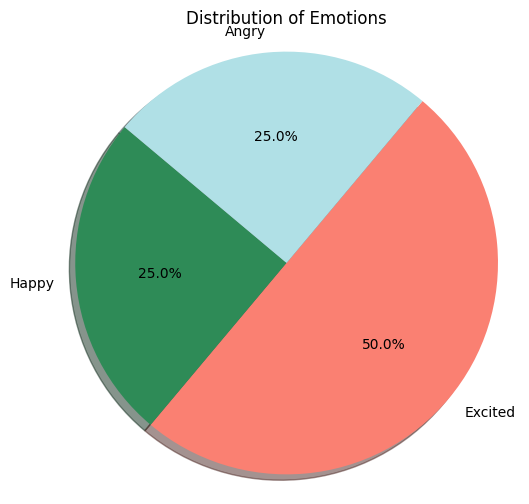

In [ ]:

def visualize_emotions(final_list):
    if not final_list:
        print("The 'final' list is empty.")
        return

    emotions_count = {}
    for emotion in final_list:
        emotions_count[emotion] = emotions_count.get(emotion, 0) + 1

    labels = list(emotions_count.keys())
    counts = list(emotions_count.values())

    # Custom color palette
    colors = ['seagreen', 'salmon', 'powderblue', 'lightgreen']

    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
    plt.title("Distribution of Emotions")
    plt.axis('equal')
    plt.show()

visualize_emotions(final)



In [ ]:
Tweets.head()

,Happy,Sad,Angry,Excited
0,http://www.dothebouncy.com/smf - some shameles...,NaN,Sooo SAD I will miss you here in San Diego!!!,"the free fillin` app on my ipod is fun, im add..."
1,2am feedings for the baby are fun when he is a...,NaN,what interview! leave me alone,If it is any consolation I got my BMI tested ...
2,Journey!? Wow... u just became cooler. hehe....,NaN,i want to go to music tonight but i lost my vo...,"Thats it, its the end. Tears for Fears vs Eric..."
3,"as much as i love to be hopeful, i reckon the...",NaN,"Uh oh, I am sunburned","just in case you wonder, we are really busy to..."
4,I really really like the song Love Story by Ta...,NaN,"S`ok, trying to plot alternatives as we speak...",i`m soooooo sleeeeepy!!! the last day o` schoo...


In [ ]:
test_set=pd.read_csv("/content/drive/MyDrive/DS Project/test.csv.xls",encoding= 'unicode_escape')
test_set.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [ ]:
test=pd.DataFrame()
test["cleaned_tweet"]=test_set["text"]
test.head()

,cleaned_tweet
0,Last session of the day http://twitpic.com/67ezh
1,Shanghai is also really exciting (precisely -...
2,"Recession hit Veronique Branquinho, she has to..."
3,happy bday!
4,http://twitpic.com/4w75p - I like it!!


In [ ]:
test_neg,test_neut,test_pos=emotion_arrays(test.cleaned_tweet.astype(str))

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 70ms/step
object
1/1 [==============================] - 0s 59ms/step
object
1/1 [==============================] - 0s 49ms/step
object
1/1 [==============================] - 0s 48ms/step
object
1/1 [==============================] - 0s 53ms/step
object
1/1 [==============================] - 0s 39ms/step
object
1/1 [==============================] - 0s 47ms/step
object
1/1 [==============================] - 0s 40ms/step
object
1/1 [==============================] - 0s 41ms/step
object
1/1 [==============================] - 0s 36ms/step
object
1/1 [==============================] - 0s 52ms/step
object
1/1 [==============================] - 0s 68ms/step
object
1/1 [==============================] - 0s 55ms/step
object
1/1 [==============================] - 0s 54ms/step
object
1/1 [==============================] - 0s 63ms/step
object
1/1 [==============================] - 0s 55ms/step
object
1/1 [

In [ ]:
categorized_test_data = categorize_emotions(test_neg,test_neut,test_pos,test)

# Access the categorized data for 'cat123' as follows:
(test_cat123neg, test_cat123neut, test_cat123pos, test_text123) = categorized_test_data['cat123']
(test_cat132neg, test_cat132neut, test_cat132pos, test_text132) = categorized_test_data['cat132']
(test_cat213neg, test_cat213neut, test_cat213pos, test_text213) = categorized_test_data['cat213']
(test_cat231neg, test_cat231neut, test_cat231pos, test_text231) = categorized_test_data['cat231']
(test_cat312neg, test_cat312neut, test_cat312pos, test_text312) = categorized_test_data['cat312']
(test_cat321neg, test_cat321neut, test_cat321pos, test_text321) = categorized_test_data['cat321']

In [ ]:

#cat123
test_cat123 = [calculate_median(test_cat123neg), calculate_median(test_cat123neut), calculate_median(test_cat123pos)]
#cat132
test_cat132 = [calculate_median(test_cat132neg), calculate_median(test_cat132neut), calculate_median(test_cat132pos)]
#cat213
test_cat213 = [calculate_median(test_cat213neg), calculate_median(test_cat213neut), calculate_median(test_cat213pos)]
#cat231
test_cat231 = [calculate_median(test_cat231neg), calculate_median(test_cat231neut), calculate_median(test_cat231pos)]
#cat312
test_cat312 = [calculate_median(test_cat312neg), calculate_median(test_cat312neut), calculate_median(test_cat312pos)]
#cat321
test_cat321 = [calculate_median(test_cat321neg), calculate_median(test_cat321neut), calculate_median(test_cat321pos)]


In [ ]:
happy123=happy
angry321=angry
sad321=sad
excited231=excited
def calculate_rmse(array1, array2):
    return np.sqrt(np.mean((array1 - array2)**2))
happy_happy=calculate_rmse(test_cat123,happy123)
angry_angry=calculate_rmse(test_cat321,angry321)
sad_sad=calculate_rmse(test_cat321,sad321)
excited_excited=calculate_rmse(test_cat231,excited231)

In [ ]:
print(happy_happy),print(angry_angry),print(sad_sad),print(excited_excited)

0.12442431
0.14062743497953611
0.17014062730889293
0.06926924349041895


(None, None, None, None)

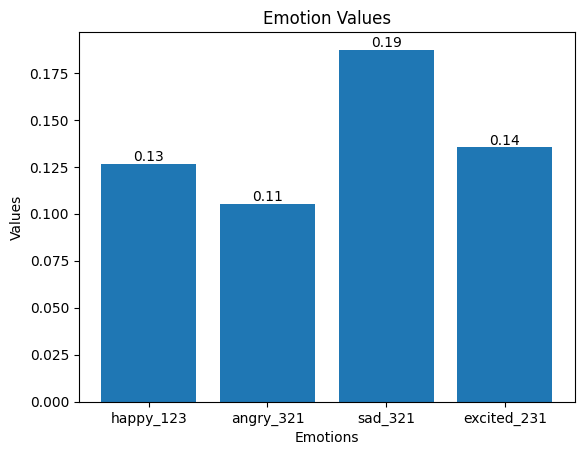

In [ ]:
import matplotlib.pyplot as plt

# Sample data
emotions = ['happy_123', 'angry_321', 'sad_321', 'excited_231']
values = [0.12634529711124415, 0.10509732126122755, 0.18728936995125867, 0.13519916]

# Create a bar chart
plt.bar(emotions, values)

# Add labels and title
plt.xlabel('Emotions')
plt.ylabel('Values')
plt.title('Emotion Values')

# Display the values on top of each bar
for i in range(len(emotions)):
    plt.text(emotions[i], values[i], f"{values[i]:.2f}", ha='center', va='bottom')

# Display the plot
plt.show()

In [ ]:
t=[]
for i in range(len(test_cat321pos)):
  t.append([test_cat321neg[i],test_cat321neut[i],test_cat321pos[i]])

In [ ]:
test_text321=list(test_text321)


In [ ]:
test_Happy = []
test_Sad = []
test_Angry = []
test_Excited = []
test_Happy.extend(test_text123)
test_Excited.extend(test_text231)
for i in range(len(t)):
  angry_score=calculate_rmse(t[i],angry)
  sad_score=calculate_rmse(t[i],sad)
  if angry_score>sad_score:
    test_Sad.append(test_text321[i])
  else:
    test_Angry.append(test_text321[i])




# Create a dictionary with padding for each emotion
max_len = max(len(test_Happy), len(test_Sad), len(test_Angry), len(test_Excited))
emotion_map = {
    'Happy': test_Happy + [np.nan] * (max_len - len(test_Happy)),
    'Sad': test_Sad + [np.nan] * (max_len - len(test_Sad)),
    'Angry': test_Angry + [np.nan] * (max_len - len(test_Angry)),
    'Excited': test_Excited + [np.nan] * (max_len - len(test_Excited))
}

# Create the DataFrame using the dictionary with padding
test_Tweets = pd.DataFrame(emotion_map)

test_Tweets.head(10)

,Happy,Sad,Angry,Excited
0,Shanghai is also really exciting (precisely -...,So hot today =_= don`t like it and i hate my ...,"Recession hit Veronique Branquinho, she has to...",Last session of the day http://twitpic.com/67ezh
1,happy bday!,im really sorry i know wallah how u feel thi...,My bike was put on hold...should have known th...,http://twitpic.com/4w75p - I like it!!
2,that`s great!! weee!! visitors!,bored bored bored! wish i had something to do ...,"I`m in VA for the weekend, my youngest son tur...",I THINK EVERYONE HATES ME ON HERE lol
3,you guys didn`t say hi or answer my questions...,still not 100% im sick of being sick!,Its coming out the socket I feel like my phon...,"soooooo wish i could, but im in school and my..."
4,thats so cool,I`m sad to have lost another person close to m...,Miss you,and within a short time of the last clue all ...
5,Watching Body of Lies...good film,oh that looks boring and even more boring yo...,Stupid storm. No river for us tonight,What did you get? My day is alright.. haven`...
6,Happy mothers day mumm xoxo,I can`t sleep. I can`t find my grandmother`s q...,My dead grandpa pays more attention to me than...,.. and you`re on twitter! Did the tavern bore...
7,Hi there. I agree! Small children should be...,Had to take my bad **** dog to the pet hotel.....,"... need retail therapy, bad. AHHH.....gimme m...",Cramps . . .
8,Hope ur havin fun in da club,"I`m a sad panda, hulu doesn`t have the elephan...","hey peoples, dont you just hate being grounded...","I`m going into a spiritual stagnentation, its ..."
9,thinks SG is wonderful,I`m gonna cry I went bad at my History test...,"There is a faux gothy chick looking at me, sor...",about to go to sleep


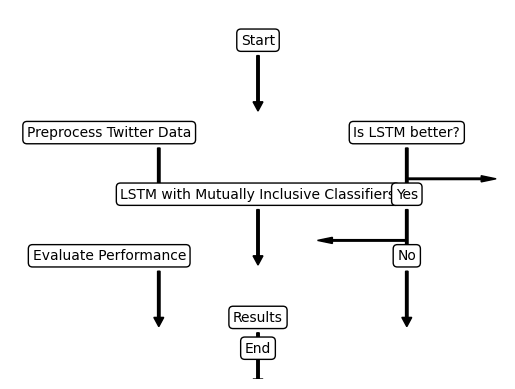

In [ ]:
import matplotlib.pyplot as plt

# Define the flowchart shapes and arrows
shapes = {
    'startstop': 'white',
    'process': 'white',
    'decision': 'white',
    'arrow': 'black'
}

# Create a new figure and axis
fig, ax = plt.subplots()

# Define the positions of the nodes
positions = {
    'Start': (0.5, 1.0),
    'Preprocess Twitter Data': (0.2, 0.7),
    'LSTM with Mutually Inclusive Classifiers': (0.5, 0.5),
    'Evaluate Performance': (0.2, 0.3),
    'Results': (0.5, 0.1),
    'End': (0.5, 0.0),
    'Is LSTM better?': (0.8, 0.7),
    'Yes': (0.8, 0.5),
    'No': (0.8, 0.3)
}

# Draw the nodes and arrows
for node, pos in positions.items():
    shape = shapes['startstop'] if node == 'Start' or node == 'End' else shapes['process']
    if node == 'Is LSTM better?' or node == 'Yes' or node == 'No':
        shape = shapes['decision']
    ax.text(pos[0], pos[1], node, ha='center', va='center', bbox=dict(boxstyle=f'round,pad=0.3', facecolor=shape, edgecolor='black'))

plt.arrow(positions['Start'][0], positions['Start'][1] - 0.05,
          0, -0.15, head_width=0.02, head_length=0.03, fc=shapes['arrow'], ec=shapes['arrow'], width=0.005)

plt.arrow(positions['Preprocess Twitter Data'][0] + 0.1, positions['Preprocess Twitter Data'][1] - 0.05,
          0, -0.15, head_width=0.02, head_length=0.03, fc=shapes['arrow'], ec=shapes['arrow'], width=0.005)

plt.arrow(positions['LSTM with Mutually Inclusive Classifiers'][0], positions['LSTM with Mutually Inclusive Classifiers'][1] - 0.05,
          0, -0.15, head_width=0.02, head_length=0.03, fc=shapes['arrow'], ec=shapes['arrow'], width=0.005)

plt.arrow(positions['Evaluate Performance'][0] + 0.1, positions['Evaluate Performance'][1] - 0.05,
          0, -0.15, head_width=0.02, head_length=0.03, fc=shapes['arrow'], ec=shapes['arrow'], width=0.005)

plt.arrow(positions['Results'][0], positions['Results'][1] - 0.05,
          0, -0.15, head_width=0.02, head_length=0.03, fc=shapes['arrow'], ec=shapes['arrow'], width=0.005)

plt.arrow(positions['Is LSTM better?'][0], positions['Is LSTM better?'][1] - 0.05,
          0, -0.15, head_width=0.02, head_length=0.03, fc=shapes['arrow'], ec=shapes['arrow'], width=0.005)

plt.arrow(positions['Yes'][0], positions['Yes'][1] - 0.05,
          0, -0.15, head_width=0.02, head_length=0.03, fc=shapes['arrow'], ec=shapes['arrow'], width=0.005)

plt.arrow(positions['No'][0], positions['No'][1] - 0.05,
          0, -0.15, head_width=0.02, head_length=0.03, fc=shapes['arrow'], ec=shapes['arrow'], width=0.005)

plt.arrow(positions['Yes'][0], positions['Yes'][1] + 0.05,
          0.15, 0, head_width=0.02, head_length=0.03, fc=shapes['arrow'], ec=shapes['arrow'], width=0.005)

plt.arrow(positions['No'][0], positions['No'][1] + 0.05,
          -0.15, 0, head_width=0.02, head_length=0.03, fc=shapes['arrow'], ec=shapes['arrow'], width=0.005)

# Set axis limits and remove ticks
ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 1.1)
ax.axis('off')

# Display the flowchart
plt.show()



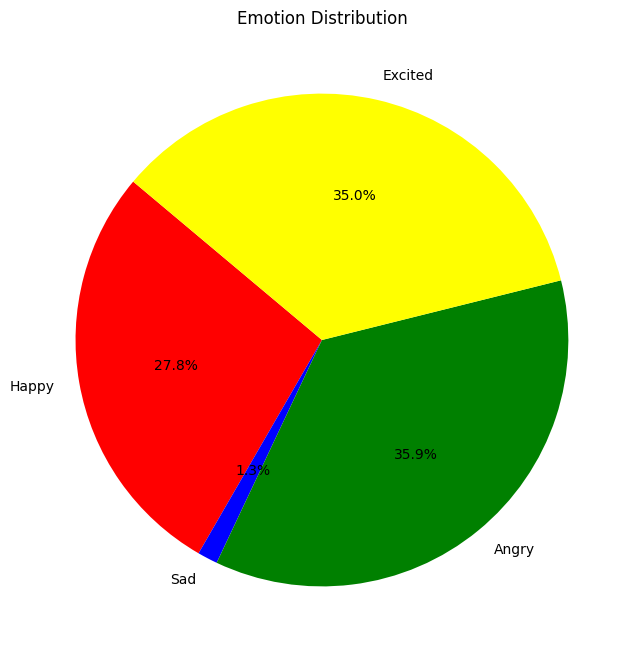

In [ ]:
emotions = ['Happy', 'Sad', 'Angry', 'Excited']
values = [len(test_Happy), len(test_Sad), len(test_Angry), len(test_Excited)]  # Replace these with actual values

# Create a pie chart
colors = ['red','blue','green','yellow']
plt.figure(figsize=(8, 8))  # You can adjust the figure size if needed
plt.pie(values, colors=colors,labels=emotions, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Emotion Distribution')

# Display the pie chart
plt.show()

In [ ]:
test_cat_names = ['test_cat123', 'test_cat132', 'test_cat213', 'test_cat231', 'test_cat312', 'test_cat321']
test_cat_arrays = [test_cat123, test_cat132, test_cat213, test_cat231, test_cat312, test_cat321]
test_cat_texts = [test_text123, test_text132, test_text213, test_text231, test_text312, test_text321]

test_Happy = []
test_Sad = []
test_Angry = []
test_Excited = []
test_final=[]

for cat_name, cat_array, cat_text in zip(test_cat_names, test_cat_arrays, test_cat_texts):
    if all(val == 0 for val in cat_array):
        continue
    min_rmse_emotion = emotion_with_min_rmse(cat_name, cat_array)
    test_final.append(min_rmse_emotion)
    if min_rmse_emotion == "Happy":
        test_Happy.extend(cat_text)
    elif min_rmse_emotion == "Angry":
        test_Angry.extend(cat_text)
    elif min_rmse_emotion == "Sad":
        test_Sad.extend(cat_text)
    else:
        test_Excited.extend(cat_text)

# Create a dictionary with padding for each emotion
max_len = max(len(test_Happy), len(test_Sad), len(test_Angry), len(test_Excited))
emotion_map = {
    'Happy': test_Happy + [np.nan] * (max_len - len(test_Happy)),
    'Sad': test_Sad + [np.nan] * (max_len - len(test_Sad)),
    'Angry': test_Angry + [np.nan] * (max_len - len(test_Angry)),
    'Excited': test_Excited + [np.nan] * (max_len - len(test_Excited))
}

# Create the DataFrame using the dictionary with padding
test_Tweets = pd.DataFrame(emotion_map)

test_Tweets.head(10)

,Happy,Sad,Angry,Excited
0,Shanghai is also really exciting (precisely -...,NaN,"Recession hit Veronique Branquinho, she has to...",I checked. We didn`t win
1,happy bday!,NaN,My bike was put on hold...should have known th...,look who I found just for you ---> http://t...
2,that`s great!! weee!! visitors!,NaN,"I`m in VA for the weekend, my youngest son tur...",Not happy
3,you guys didn`t say hi or answer my questions...,NaN,Its coming out the socket I feel like my phon...,you should totally come get me and bring me t...
4,thats so cool,NaN,So hot today =_= don`t like it and i hate my ...,_LaMont yr very young looking dude
5,Watching Body of Lies...good film,NaN,Miss you,_berland LMAO I know I know
6,Happy mothers day mumm xoxo,NaN,Stupid storm. No river for us tonight,learning tat the scenic way din plan to go t...
7,Hi there. I agree! Small children should be...,NaN,My dead grandpa pays more attention to me than...,And- hand made by Dan & Jenn -sock blockers .....
8,Hope ur havin fun in da club,NaN,"... need retail therapy, bad. AHHH.....gimme m...",yay about breaking 200!
9,thinks SG is wonderful,NaN,"hey peoples, dont you just hate being grounded...",riley hacked my twitter! hahaha :]


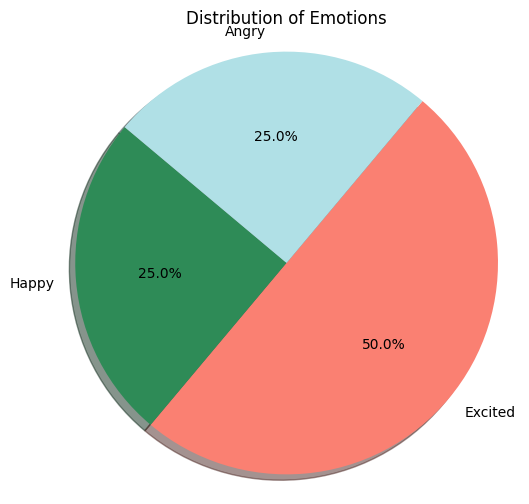

In [ ]:
visualize_emotions(test_final)